# Online Payments Fraud Detection - A Case Study

* Problem Definiton: Blossom Bank as a multinational financial service group needs to have the capacity to predict fraud and terminate fraudulent transactions.
* Solution: Build a machine learning model to predict online payment fraud
    

#### Data Dictionary:
* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrig: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of the recipient after the transaction
* isFraud: fraud transaction
    

In [1]:
# Perform Exploratory Data Analysis in Python
# a. Visualize relationships between the label and some key features
# b. Explore correlatons
# c. Conduct univariate and multivariate analysis as much as is feasible

In [2]:
# IMPORT DATA ANALYSIS LIBRARIES
# import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# IMPORT VISUALIZATION LIBRARIES
# import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# from sklearn.tree import DecisionTreeRegressor

# 1. Data Inspection

* Load the data set


In [3]:
# LOAD THE DATA FROM GOOGLE DRIVE AS PROVIDED

url = 'https://drive.google.com/file/d/1ZIjmAjPccvy16mOk7nrPtWe-_3rRP5zy/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [4]:
# GET AN OVERVIEW OF THE DATA VIA TABLE VIEW

df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


In [5]:
# GET A SUMMARY OF DATA TYPES AND CHECK NULLS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
df.shape

(1048575, 10)

In [7]:
# GET DESCRIPTIVE STATISTICS OF THE DATASET

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [8]:
# TRANSPOSE THE DESCRIPTIVE STATISTICS

df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1048575.0,2.696617e+01,1.562325e+01,1.0,15.000,20.00,39.000,95.0
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0
isFraud,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.0


In [9]:
# CHECK FOR MISSING VALUES

# df.isnull() # This gives a tabular response of True and False for presence of null values.It's too exhaustive.
df.isnull().sum() # This gives a better summary of how many null values are present in each column.

# This shows that there is no missing values in all columns.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<AxesSubplot: title={'center': 'Missing Data'}>

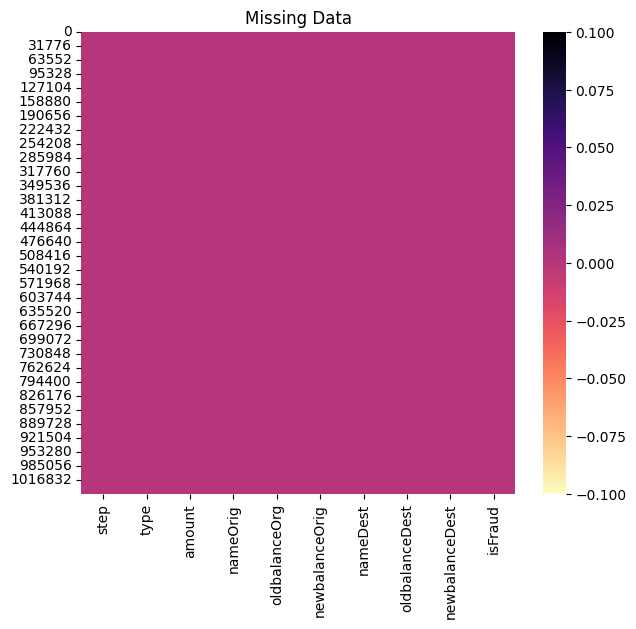

In [10]:
# visualise the missing data
plt.figure(figsize=(7,6))
plt.title('Missing Data')
sns.heatmap(df.isnull(),cbar=True, cmap='magma_r')

### Dataset Description

* Here is a description of the dataset:
    * The data is accessed from a google drive.
    * It contains 1,048,575 rows and 10 columns.
    * There are no missing or null values present.
    * The data types present are: 5 floats, 2 integers and 3 objects (ie containing strings)

# 2. Exploratory Data Analysis and Data Visualization

In this section, we visualize important relationships in the data set.

### Explore Correlations

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\563559845.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df.corr()


<AxesSubplot: >

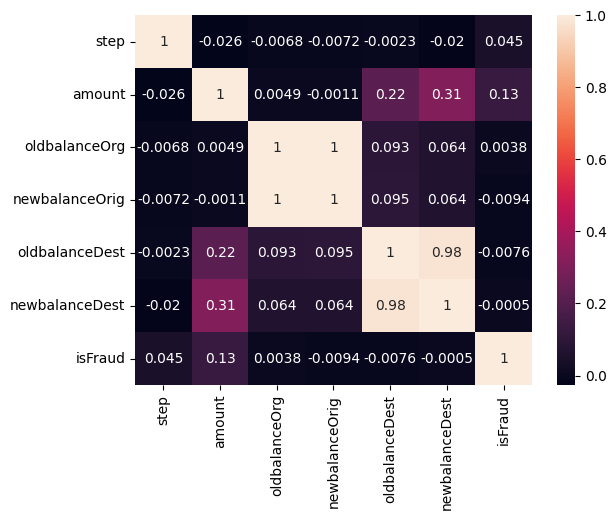

In [11]:
corel = df.corr()
sns.heatmap(corel,annot=True)

#### Correlations
    * Correlation diagram above shows the strength of the relationship betweeen different variables
    * The higher the number, the stronger the relationship or dependency.
    * Positive values indicate an increasing relationshiop as the other variable increases.
    * Negative corrlation shows an inverse relationship. ie one increases as the other decreases.
    * Correlation ranges from -1 to 0 to +1
    * If we consider +/- 0.5 as an intermediate point, then only oldbalanceDest - newbalanceDest are the only pairs that
    have strong, positive correlation (0.98)
    * Weak correlation exist between:
        * amount - isFraud (0.13)
        * amount - newbalanceDest (0.31)
        * amount - oldbalanceDest (0.22)
    These pairs are further analysed through visualizations including Univariate, Bivariate and Multivariate Analyses.

### Univariate Analysis

In [12]:
df.step.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)

<AxesSubplot: xlabel='newbalanceDest'>

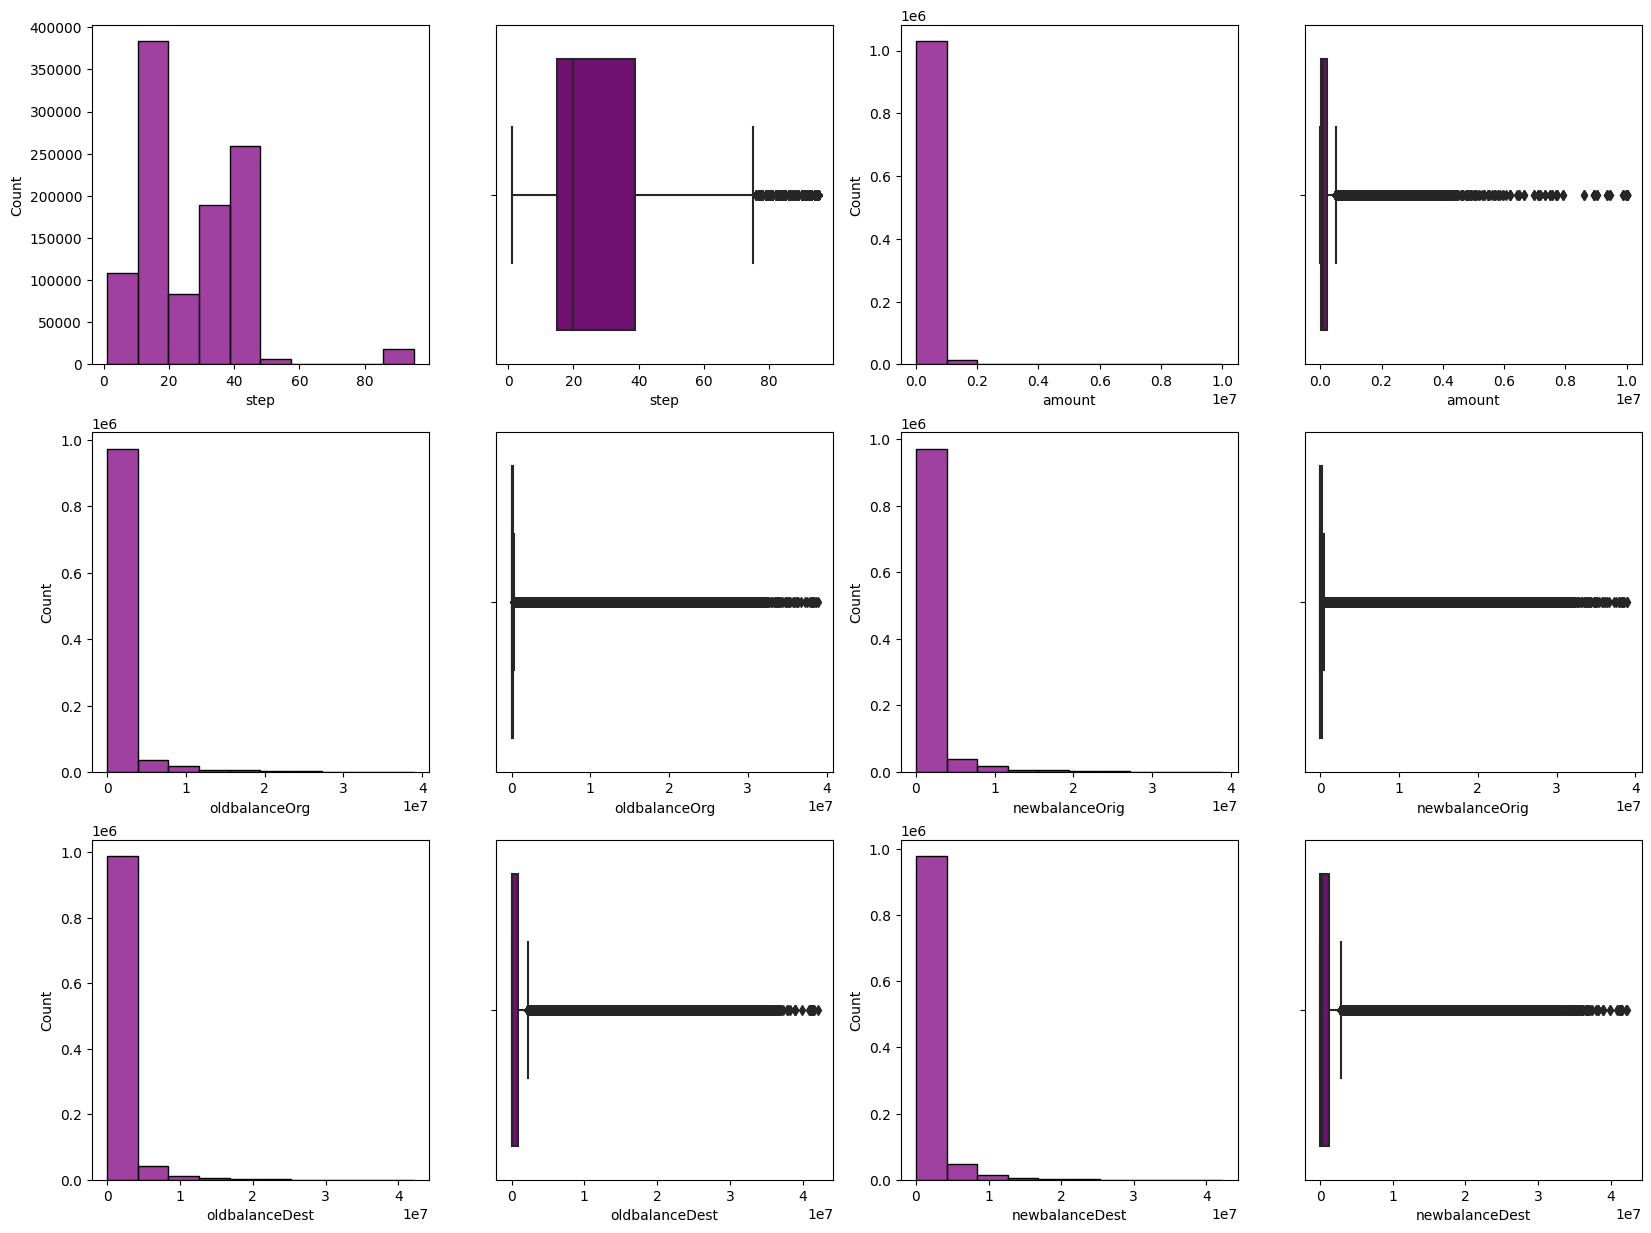

In [13]:
fig, axes = plt.subplots(3,4, figsize=(20,15))

# Numerical variables

sns.histplot(data = df,x="step", bins=10, color = 'purple', ax=axes[0,0])
sns.boxplot(data = df, x="step", color ="purple", ax=axes[0,1])

sns.histplot(data = df, x='amount', bins=10, color = 'purple', ax=axes[0,2])
sns.boxplot(data = df, x='amount',  color ="purple", ax=axes[0,3])

sns.histplot(data = df, x='oldbalanceOrg',bins = 10,color = 'purple',  ax=axes[1,0])
sns.boxplot(data = df, x='oldbalanceOrg',  color ='purple', ax=axes[1,1])

sns.histplot(data = df, x='newbalanceOrig',bins = 10,color = 'purple',ax=axes[1,2])
sns.boxplot(data = df, x='newbalanceOrig',  color ='purple', ax=axes[1,3])

sns.histplot(data = df, x='oldbalanceDest',bins = 10,color = 'purple',ax=axes[2,0] )
sns.boxplot(data = df, x='oldbalanceDest', color = 'purple',ax=axes[2,1])

sns.histplot(data = df, x='newbalanceDest',bins = 10,color = 'purple',ax=axes[2,2] )
sns.boxplot(data = df, x='newbalanceDest', color = 'purple',ax=axes[2,3])

#### Visualization Interpretation
Step: The histogram plot of steps shows that it is left skewed. The left skewness shows the presence of higher value outliers
    that would cause the mean to be higher than both the median and mode. The box plot shows thesame with outliers greater than around 80.
    The median of about 20 shows that 50% of the data are less tahn 20 and the other 50% are greater than 20. 75% (Q3) are less than 40 while the remaining 25% are greater than 40.
Amount, OldbalanceOrg, NewbalanceOrig, OldbalanceDest, NewbalanceDest have values bound within a narrow range and outliers of wider ranges.

In [14]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<AxesSubplot: >

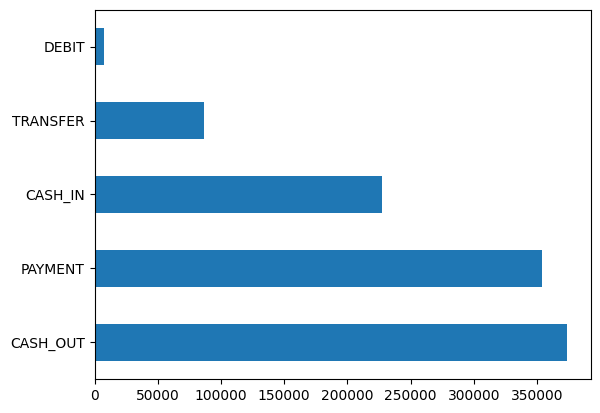

In [15]:
df.type.value_counts().plot.barh()

Type has 5 unique values which are payment, transfer, cash-out, debit and cash-in.
Cash-out is the most common type of transaction, followed by payment, cash in, transfer and debit in decreasing order.

<AxesSubplot: xlabel='isFraud', ylabel='Count'>

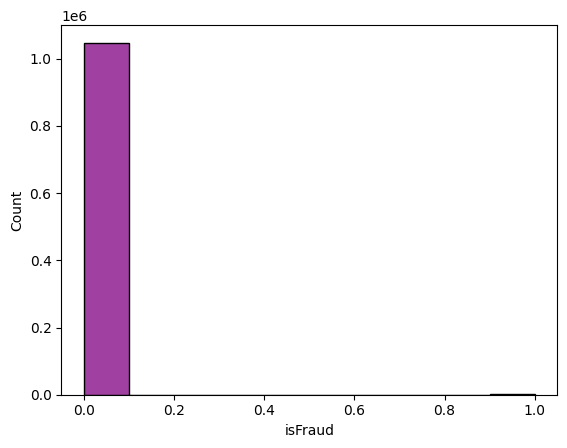

In [16]:
sns.histplot(data = df, x='isFraud',bins = 10,color = 'purple')

In [17]:
df.isFraud.unique()

array([0, 1], dtype=int64)

In [18]:
df.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [19]:
# Create a function to create proper labels for the 'survived feature'

def fraud(x):
    if x == 1: 
        return 'Fraud'
    else:
        return 'Not Fraud'
    
df['isFraud_label'] = df['isFraud'].apply(fraud)

In [20]:
df.isFraud.value_counts(normalize=True)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

In [21]:
df.isFraud_label.value_counts(normalize=True)

Not Fraud    0.998911
Fraud        0.001089
Name: isFraud_label, dtype: float64

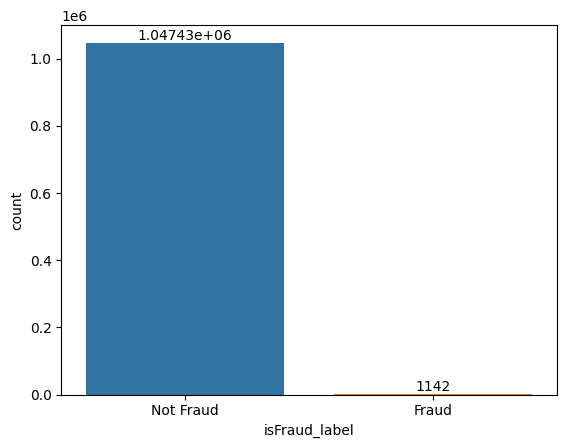

In [22]:
ax = sns.countplot(x='isFraud_label', data=df)
for i in ax.containers:
    ax.bar_label(i,)

isFraud has 2 categories which are:
    0- Not Fraud which is 99.9% of the values
    1- Fraud which represents about 0.1% of the values.

### Summary of Findings
1. oldbalanceDest - newbalanceDest are the only pairs that have strong, positive correlation while Weak correlation exist
   between amount vs isFraud, amount vs newbalanceDest, and amount vs oldbalanceDest.
2. A left skew data means that the mean is greater than both the mode and median due to the effect the high-values have to 
   make the mean tend to an higher value.
3. The dataset is left skewed with the presence of outliers that are greater than the maximimum value defined by a box plot. 
4. Amount, OldbalanceOrg, NewbalanceOrig, OldbalanceDest, NewbalanceDest have values bound within a narrow 
   range and outliers of wider ranges.  
3. Fraud has 2 categories of data including 0 and 1 with 0 being not fraud and 1 being fraud.
4. Type has 5 unique values which are payment, transfer, cash-out, debit and cash-in. Cash-out is the most common type 
   of transaction, followed by payment, cash in, transfer and debit in decreasing order.

### Bivariate Analysis

[Text(0.5, 0, 'Payment Type'), Text(0, 0.5, 'Count')]

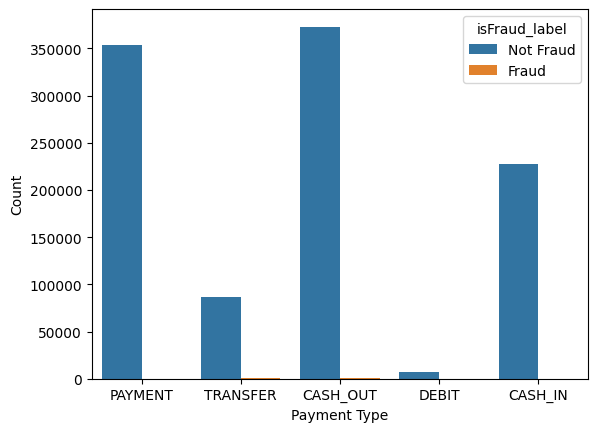

In [23]:
sns.countplot(x='type', data=df, hue = "isFraud_label").set(xlabel='Payment Type', ylabel='Count')
#plt.legend(labels=["Not Fraud","Fraud"])

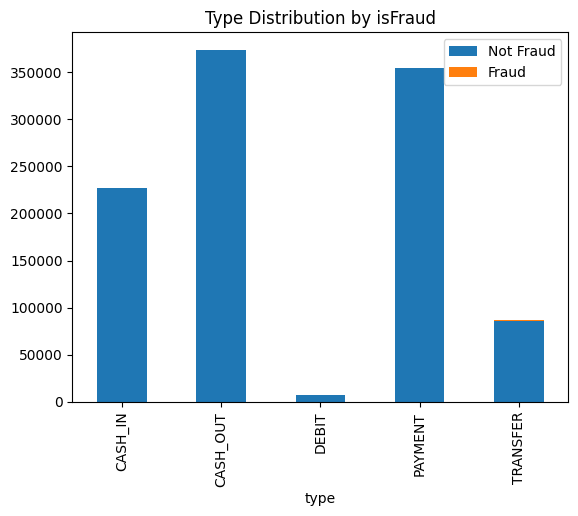

In [24]:
#create pivot of type and isFraud
type_isFraud_pivot = pd.crosstab(df.type,df.isFraud)

#plot the data
type_isFraud_pivot.plot.bar(stacked=True)
plt.legend(labels=["Not Fraud","Fraud"], loc='upper right')
plt.title('Type Distribution by isFraud')
plt.show()

Both plots above show the number of each transaction type grouped by whether or not it is fraudulent.
Fraudulent transactions are identified within transfer and cash out.
As observed before, cash out is the most occuring transaction type while debit is the least.


<AxesSubplot: xlabel='type', ylabel='amount'>

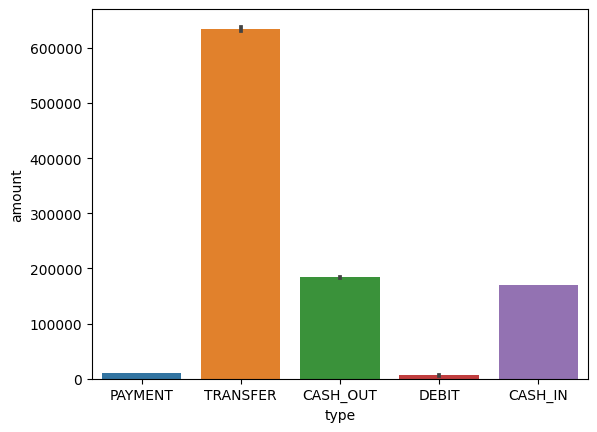

In [25]:
sns.barplot(x='type', y = 'amount', data = df)

Although cash out is the most common transaction, Transfer amounts are rather the highest 
while cash out is the second highest in amount being transacted.

<AxesSubplot: xlabel='isFraud_label', ylabel='amount'>

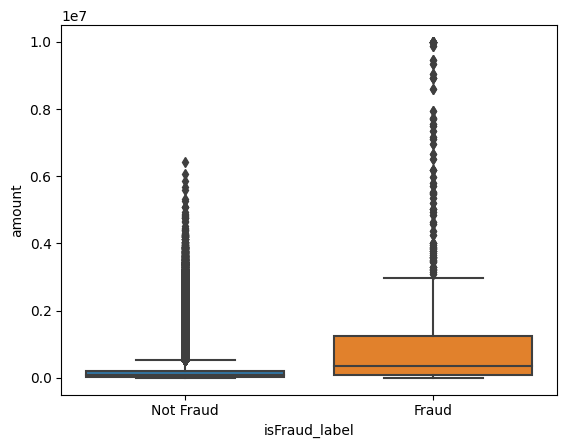

In [26]:
sns.boxplot(x = "isFraud_label", y = "amount", data = df)

Box plot of 'isFraud' shows both fraudulent and non-fraudulent transaction being left skewed with a wider range of outliers 
in amount than the range of actual values withibn the box plot. The median amount in Fraudulent transaction is higher than that of 
non-fraudulent transaction.

<AxesSubplot: xlabel='newbalanceDest', ylabel='amount'>

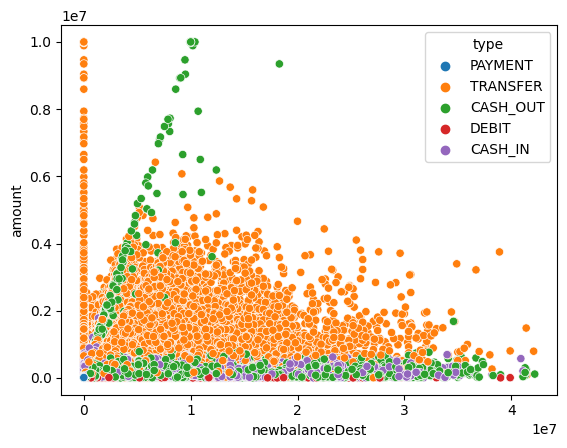

In [27]:
sns.scatterplot(data = df, x ='newbalanceDest', y = 'amount', hue = 'type')

A scatter plot of newbalanceDest versus amount shows a dominance of Transfer followed by cash out.
We observe a vertical cluster of transfer type and a diagonal cashout that are different in trend from the horizontal trend 
in the other transaction types. 

<AxesSubplot: xlabel='newbalanceDest', ylabel='amount'>

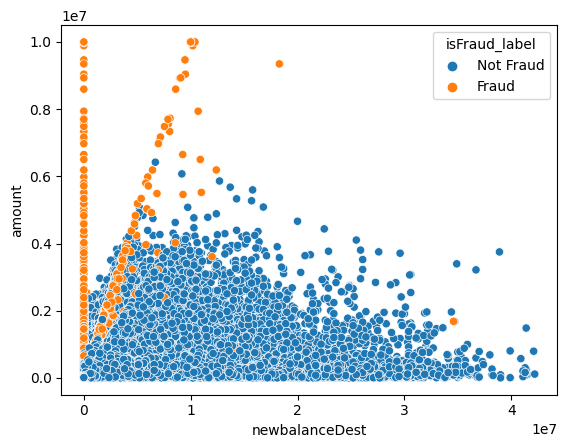

In [28]:
sns.scatterplot(data = df, x ='newbalanceDest', y = 'amount', hue = 'isFraud_label')

The observed vertical cluster of transfer type and diagonal cashout which are different from the horizontal trend 
in the other transaction types are seen to be Fraudulent type of transaction while the others are non-fraudulent.

<AxesSubplot: xlabel='type', ylabel='amount'>

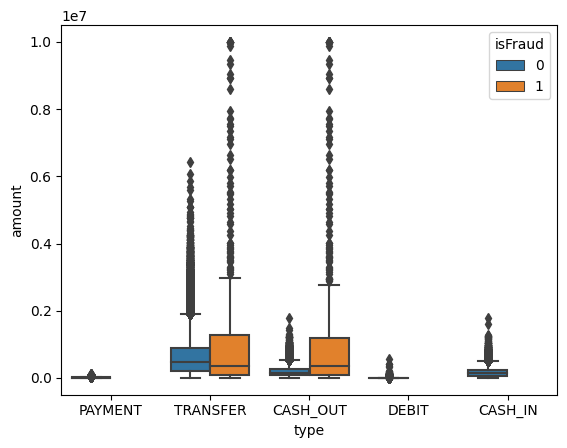

In [29]:
sns.boxplot(x = "type", y = "amount", hue = 'isFraud', data = df)

* Transaction types versus amount are separated into fraudulent and non-fraudulent categories. 
* Transfer and cash-out are seen to dominate.
* While fraudulent transactions in both Transfer and Cash out look quite similar, the maximum amount for fraudulent transfers is 
  higher than for fraudulent cashouts.
* For non-fraudulent transactions, transfer has a much wider range in amount than cash-out. 
* Transfer also had a higher median than cashout.

<AxesSubplot: xlabel='oldbalanceDest', ylabel='amount'>

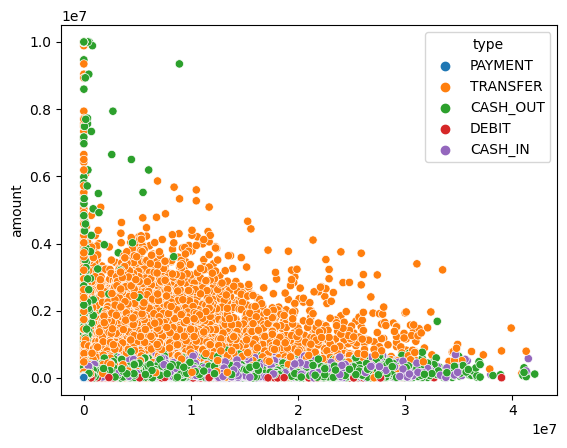

In [30]:
sns.scatterplot(data = df, x ='oldbalanceDest', y = 'amount', hue = 'type')

* A plot of amount versus oldbalanceDest shows very poor correlation and a dominance of Transfer.

<AxesSubplot: xlabel='oldbalanceDest', ylabel='amount'>

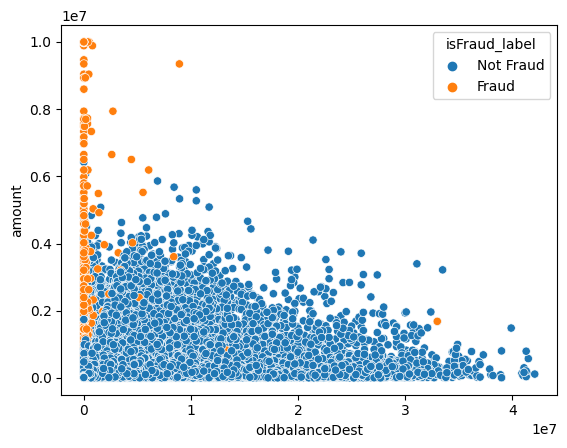

In [31]:
sns.scatterplot(data = df, x ='oldbalanceDest', y = 'amount', hue = 'isFraud_label')

This scatter plot shows zonation of amount vs oldbalanceDest into dominant non-fraudulent and a minor fraudulent transaction.

<AxesSubplot: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

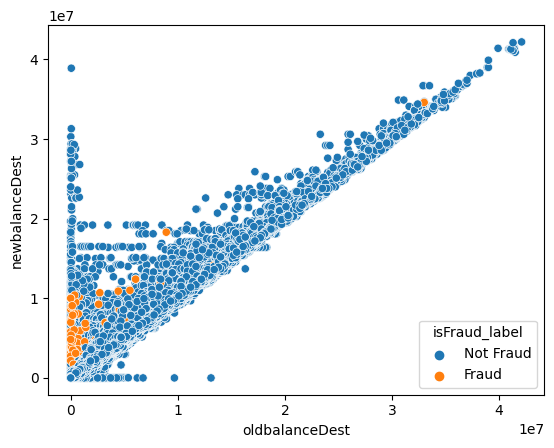

In [33]:
sns.scatterplot(data = df, x ='oldbalanceDest', y = 'newbalanceDest', hue = 'isFraud_label')

<AxesSubplot: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

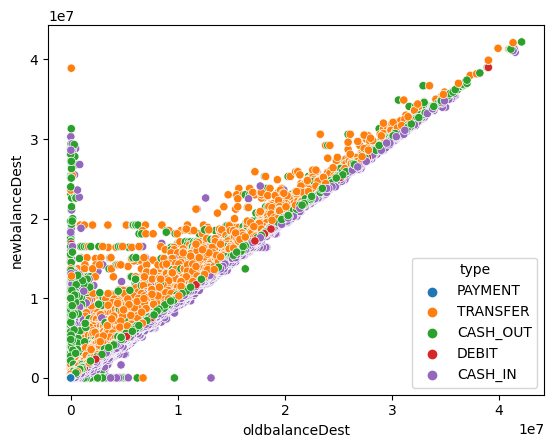

In [34]:
sns.scatterplot(data = df, x ='oldbalanceDest', y = 'newbalanceDest', hue = 'type')

There is strong, positive correlation between newbalanceDest and oldbalanceDest. Most of the data are transfer type of transaction.

### Summary of Findings
1. Fraudulent transactions are identified within transfer and cash out.
2. Although cash out is the most common transaction, Transfer amounts are rather the highest while 
   cash out is the second highest in amount being transacted.
3. Box plot of 'isFraud' shows both fraudulent and non-fraudulent transaction being left skewed with a 
   wider range of outliers in amount than the range of actual values withibn the box plot. The median amount in 
   Fraudulent transaction is higher than that of non-fraudulent transaction.
4. A scatter plot of newbalanceDest versus amount shows a dominance of Transfer followed by cash out.
5. The observed vertical cluster of transfer type and diagonal cashout which are different from the horizontal 
   trend in the other transaction types are seen to be Fraudulent type of transaction while the others are non-fraudulent.
6. While fraudulent transactions in both Transfer and Cash out look quite similar, the maximum amount for fraudulent 
   transfer is higher than for fraudulent cashouts.
7. For non-fraudulent transactions, transfer has a much wider range in amount than cash-out.
8. Transfer also had a higher median than cashout.
9. There is poor correlation between amount and oldbalanceDest.
9. There is strong, positive correlation between newbalanceDest and oldbalanceDest. Most of the data are transfer type of transaction.

# 3. Machine Learning Modelling with Original, Imbalanced Dataset

### Check the Data for Imbalance

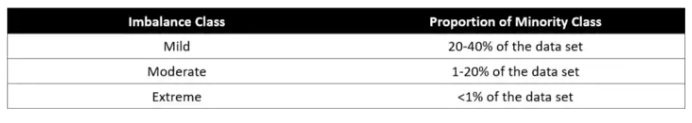
Image source: https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

In [35]:
# Start with using copy of the original dataframe

#Make copy of the original data
df1 = df.copy()

In [36]:
print('not_Fraud:', df1.isFraud.value_counts()[0])
print('Fraud:',df1.isFraud.value_counts()[1])

print('---------------------------------------')
print('---------------------------------------')

print('not_Fraud:', round(df1.isFraud.value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Fraud:', round(df1.isFraud.value_counts()[1]/len(df1) * 100,2), '% of the dataset')


not_Fraud: 1047433
Fraud: 1142
---------------------------------------
---------------------------------------
not_Fraud: 99.89 % of the dataset
Fraud: 0.11 % of the dataset


- There are 99.89% non-fraudulent transactions and 0.11% fraudulent transactions.
- This might seem like a highly accurate result but it's actually misleading as the EDA of all the 
  dataset analysed earlier shows a highly imbalanced dataset.
- From the imbalance classification above, 'isFraud' is extremely imbalanced as the proportion of the 
  minority class is way less than 1% of the dataset.
- For this reason, accuracy score should not be used as a metric with this imbalanced dataset as '
  it will be high and misleading.
- This leads to a need for processing the data inorder to scale it fairly and to sample/shuffle the data.

**First, we model using the imabalanced data as it is to see how well it performs and then we process the data to correct for 
outliers and imbalance and compare the model's performance to that of the original dataset.**


## Model Selection, Training, and Validation
a. Train and test the following supervised learning models:
    
    - LogisticRegression
    - DecisionTree
    - KNeighbors
    - Random Forest

### Select Target (Output Label)

In [37]:
y = df1[['isFraud']]
y.head(5)
#y.info()

,isFraud
0,0
1,0
2,1
3,1
4,0


### Select Input Features
* Use other columns as features except isFraud column

In [38]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFraud_label'],
      dtype='object')

In [39]:
# Drop the target column from the training data
X = df1.drop(columns = ['nameOrig', 'nameDest', 'isFraud','isFraud_label'], axis=1)
print(X.head())
print('--------------------------------')
print('--------------------------------')
print(X.info())

   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
--------------------------------
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float6

### Perform Feature Engineering
 a. Encoding categorical variables
 b. Create new features from existing features where necessary, depending on insights from your EDA

In [40]:
# Label encode type column as it is the only categorical variable now present
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
# Encode labels in column 'type' in the X-dataframe
X.type = lab.fit_transform(X.type)
print(X.head())
print(X.info())

   step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     3   9839.64       170136.0       160296.36             0.0   
1     1     3   1864.28        21249.0        19384.72             0.0   
2     1     4    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  fl

### Import ML algorithms and initialize them

In [41]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### Create train and test datasets using the original, imbalanced data
- Split data set into a train and test set. 
- The test set will be used to evaluate the trained model.
- 30% of the dataset is allocated to test set
- The raw, imbalanced data is not stratified so that the class ratio between training and testing sets is not equivalent or similar for now

In [42]:
# Use train_test_split to divide the dataset into train and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [43]:
print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


         step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
618349    34     3   19392.97      171586.97        152194.0            0.00   
766114    39     1  427752.86         460.00             0.0       581179.28   

        newbalanceDest  
618349            0.00  
766114      1008932.15  

         step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
781974    39     4  574748.85       106088.0             0.0            0.00   
937737    43     0   21118.84     10500000.0      10500000.0      2689219.94   

        newbalanceDest  
781974       574748.85  
937737      2668101.10  

         isFraud
618349        0
766114        0

         isFraud
781974        0
937737        0


In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((734002, 7), (734002, 1), (314573, 7), (314573, 1))

In [45]:
# Initialize the Models

LR = LogisticRegression() # initialize logistic regression
DT = DecisionTreeClassifier() # initialize decision tree
KN = KNeighborsClassifier() #  initialize k neighbors
RF = RandomForestClassifier() # initialize random forest

In [46]:
#create list of your model names
models = [LR, DT, KN, RF]

In [47]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction, y_test))
    plot_confusion_matrix(model, X_test, y_test)
    plt.title('Confusion Matrix for {}'.format(model.__class__.__name__))
    plt.show()
    
    

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.9989604956560163 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314363
           1       0.33      0.55      0.42       210

    accuracy                           1.00    314573
   macro avg       0.67      0.78      0.71    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


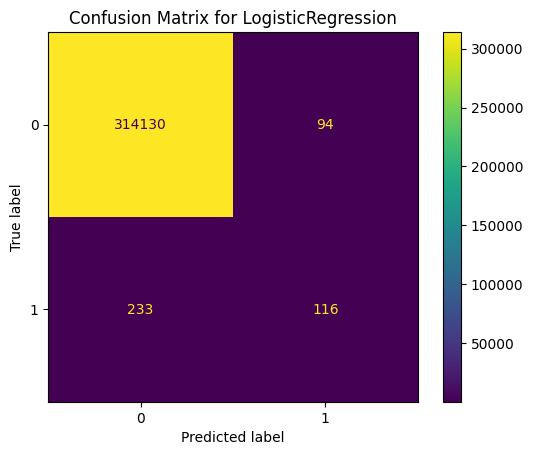


For DecisionTreeClassifier, Accuracy score is 0.9995708468304654 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314219
           1       0.81      0.80      0.81       354

    accuracy                           1.00    314573
   macro avg       0.91      0.90      0.90    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


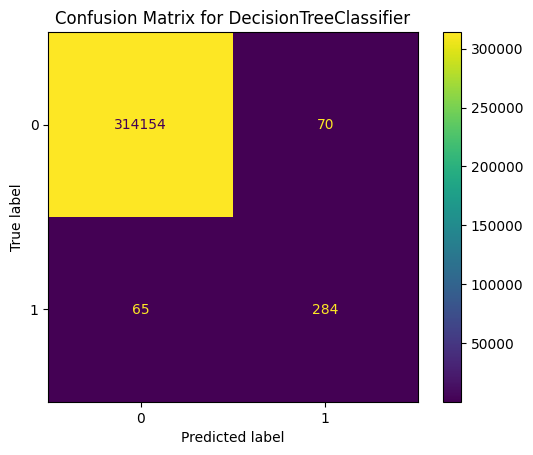

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9993515018771477 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314342
           1       0.54      0.81      0.65       231

    accuracy                           1.00    314573
   macro avg       0.77      0.91      0.82    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


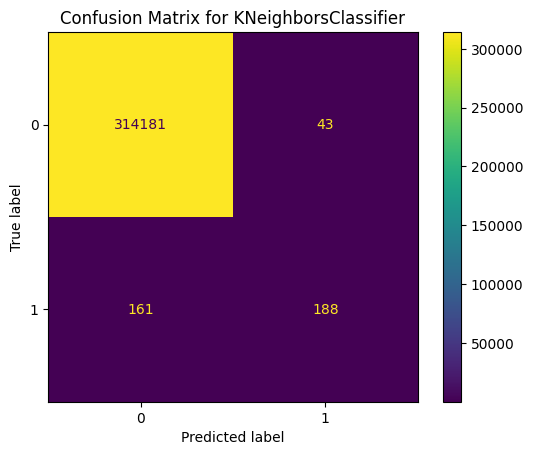

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\952797832.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)



For RandomForestClassifier, Accuracy score is 0.9997488659230132 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314279
           1       0.81      0.96      0.88       294

    accuracy                           1.00    314573
   macro avg       0.90      0.98      0.94    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


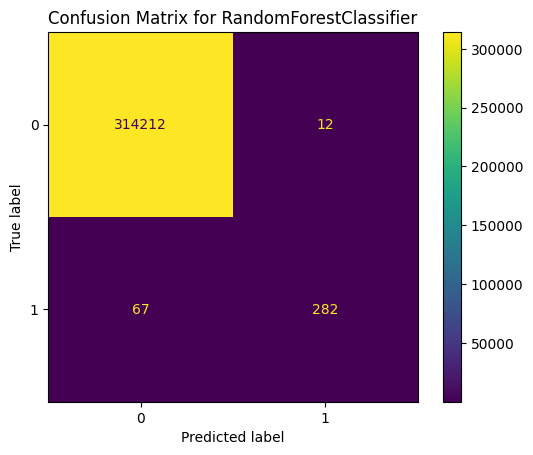

In [48]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)

- For the raw dataset, accuracy is highest at 99.97% in Random Forest
- Precision, Accuracy and F1-Score are 1 for all the models for the Non-Fraudulent Classification
- Going forward, we will describe the metrics in terms of their performance on the Fraudulent (class 1) Classification.
- Precision is highest in Decision Tree (0.82) while Random Forest has 0.81.
- Recall is highest in Random Forest (0.96)
- F1-Score is highest in Random Forest (0.88)
- With highest accuracy, Recall and F1-Score in Random Forest and a second higher precision, Random Forest is considered to 
  be the best model in this scenario.
- 0.81 Precision means that out of all the transactions that Random Forest predicted to be fraudulent, only 81% were actually fraudulent.
- 0.96 Recall with Random Forest means that out of all the transactions that were actually fraud, the model only predicted correctly for 96% 
- These values are obtained from the confusion matrix as shown in the image and table below:

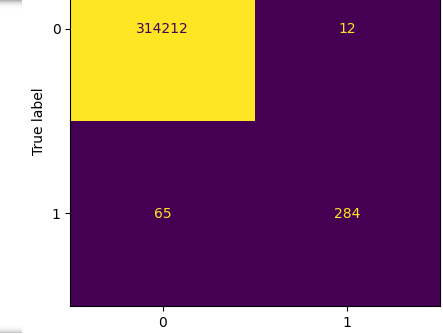
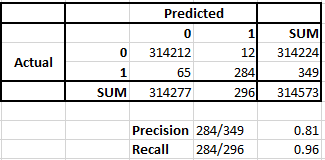


### Inspect Feature Importances

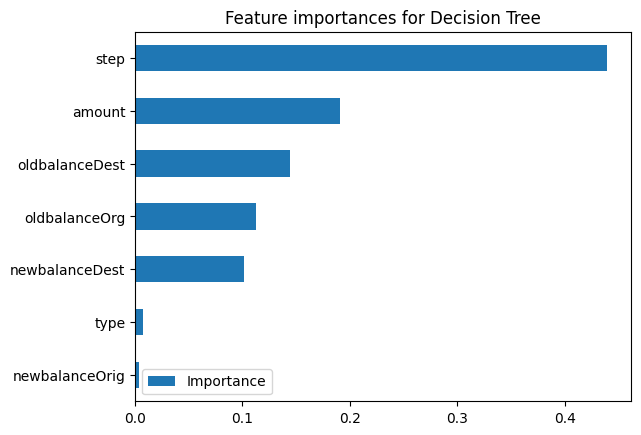

In [49]:
#get feature importances
DT_importances = pd.DataFrame(data = DT.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
DT_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Decision Tree')
plt.show()

In [50]:
#get these top 10 importances in descending order
DT_importances[:5].sort_values(by='Importance').index.values  # in ascending order , ascending = True
# DT_importances[:5].sort_values(by='Importance', ascending = False).index.values  # in descending order

array(['newbalanceOrig', 'type', 'oldbalanceOrg', 'amount', 'step'],
      dtype=object)

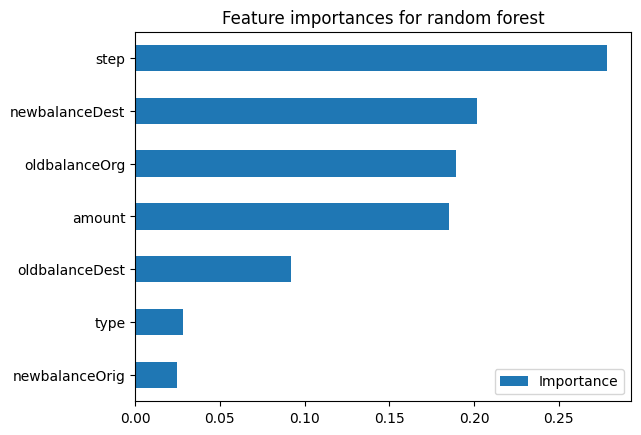

In [51]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [52]:
#get these top 5 importances
RF_importances[:5].sort_values(by='Importance').index.values

array(['newbalanceOrig', 'type', 'amount', 'oldbalanceOrg', 'step'],
      dtype=object)

- Logistic Regression and KNeighbour do not have attributes called feature importance.

### Feature Selection Based on Top 5 Importances

In [53]:
#create a new X train with only 5 features
X_train2 = X_train[['type', 'newbalanceOrig', 'amount', 'oldbalanceOrg', 'step']]
X_train2.head(2)

,type,newbalanceOrig,amount,oldbalanceOrg,step
618349,3,152194.0,19392.97,171586.97,34
766114,1,0.0,427752.86,460.00,39


In [54]:
#create a new X_test with only 5 features so we can predict on them
X_test2 = X_test[['type', 'newbalanceOrig', 'amount', 'oldbalanceOrg', 'step']]
X_test.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
781974,39,4,574748.85,106088.0,0.0,0.00,574748.85
937737,43,0,21118.84,10500000.0,10500000.0,2689219.94,2668101.10


In [55]:
X_train2.shape, y_train.shape, X_test2.shape, y_test.shape

((734002, 5), (734002, 1), (314573, 5), (314573, 1))

#### Model with top 5 important features

In [56]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train2,y_train,X_test2,y_test):
    #fit your model
    model.fit(X_train2,y_train)
    #predict on the fitted model
    prediction2 = model.predict(X_test2)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction2,y_test)))
    print(classification_report(prediction2, y_test))
    plot_confusion_matrix(model, X_test2, y_test)  
    plt.title('Confusion Matrix for {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.998928706532347 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314375
           1       0.30      0.53      0.38       198

    accuracy                           1.00    314573
   macro avg       0.65      0.76      0.69    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


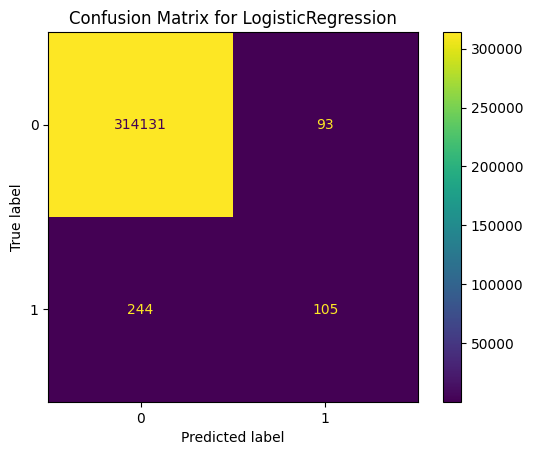


For DecisionTreeClassifier, Accuracy score is 0.9994913740212924 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314236
           1       0.75      0.78      0.77       337

    accuracy                           1.00    314573
   macro avg       0.88      0.89      0.88    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


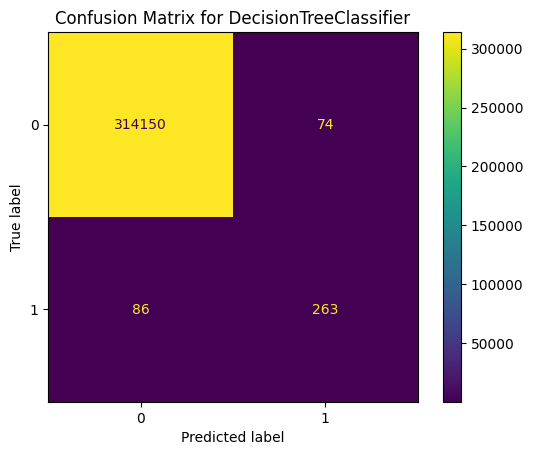

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9993356073153131 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314235
           1       0.68      0.71      0.70       338

    accuracy                           1.00    314573
   macro avg       0.84      0.85      0.85    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


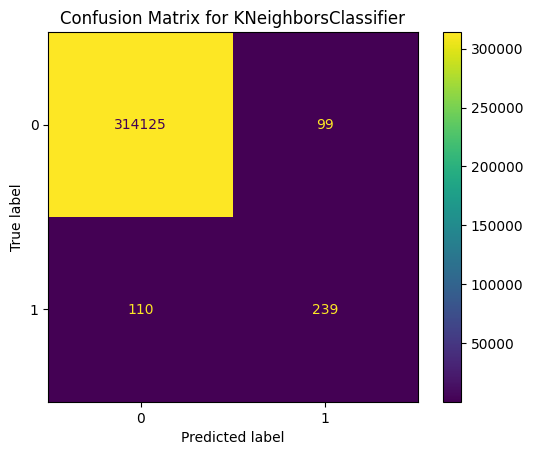

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\1699734661.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train2,y_train)



For RandomForestClassifier, Accuracy score is 0.9996376039901708 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314322
           1       0.70      0.97      0.81       251

    accuracy                           1.00    314573
   macro avg       0.85      0.98      0.90    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


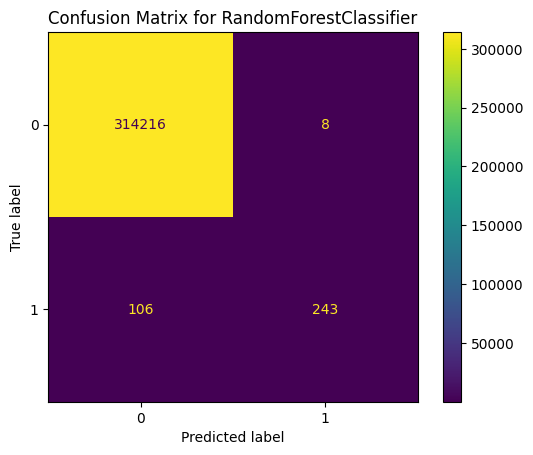

In [57]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train2,y_train,X_test2,y_test)

The models were trained and tested using the top 5 Important Features and Random Forest Classifier once again performed best.
The metrics reduced by using fewer attributes than we used in the original.
Recall was thesame 96% but accuracy reduced from 99.97 to 99.96%; precision reduced drastically from 81% to 69%, while F1-score reduced from 0.88 to 0.80.

# 4. Machine Learning Modelling with Stratified and Rescaled Dataset

## Handle Imbalance and Outliers in the dataset
- Imbalance is handled through undersampling and oversampling.
- Outliers are taken care of via Feature Scaling.

## Oversampling and Undersampling Dataset

- Its best to not tamper with the test set
- Split data into test and train sets before carrying out oversampling and undersampling.
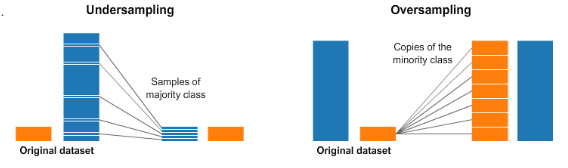

Image Source: https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data

In [59]:
# Start with using copy of the original dataframe

#Make copy of the original data
df2 = df.copy()

In [60]:
# Select the target and features
y = df2[['isFraud']]
X = df2.drop(columns = ['nameOrig', 'nameDest', 'isFraud','isFraud_label'], axis=1)

In [61]:
print(y.info())
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 1 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   isFraud  1048575 non-null  int64
dtypes: int64(1)
memory usage: 8.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 56.0+ MB
None


### Label Encoding

In [62]:
# Label encode type column as it is the only categorical variable now present
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
# Encode labels in column 'type' in the X-dataframe
X.type = lab.fit_transform(X.type)

In [63]:
# Use train_test_split to divide the dataset into train and test datasets

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y, test_size = 0.3,stratify = y, random_state = 42)
X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape

((734002, 7), (734002, 1), (314573, 7), (314573, 1))

In [64]:
X_train3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
585327,33,1,59005.75,20950.00,0.00,0.00,59005.75
65578,9,3,19920.17,44496.00,24575.83,0.00,0.00
446123,19,1,141429.92,13404.00,0.00,2601102.28,2742532.20
842411,41,1,117581.97,0.00,0.00,180713.32,298295.29
86621,10,4,1203530.73,54511.59,0.00,1253187.80,2456718.53


In [65]:
y_train3.head()

,isFraud
585327,0
65578,0
446123,0
842411,0
86621,0


### Train and Test on Stratified Dataset

In [66]:
# Train and test the models on a stratified dataset
#create function to train a model and evaluate accuracy
def trainer(model,X_train3,y_train3,X_test3,y_test3):
    #fit your model
    model.fit(X_train3,y_train3)
    #predict on the fitted model
    prediction3 = model.predict(X_test3)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction3,y_test3)))
    print(classification_report(prediction3, y_test3))
    plot_confusion_matrix(model, X_test3, y_test3)
    plt.title('Confusion Matrix for {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.9989096330581455 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314357
           1       0.31      0.50      0.39       216

    accuracy                           1.00    314573
   macro avg       0.66      0.75      0.69    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


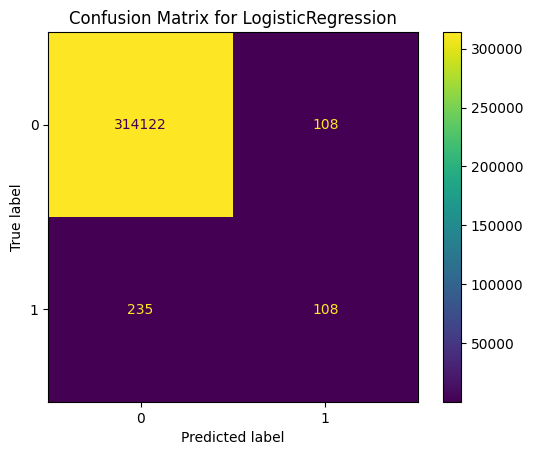


For DecisionTreeClassifier, Accuracy score is 0.9995962781294008 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314243
           1       0.80      0.83      0.81       330

    accuracy                           1.00    314573
   macro avg       0.90      0.91      0.91    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


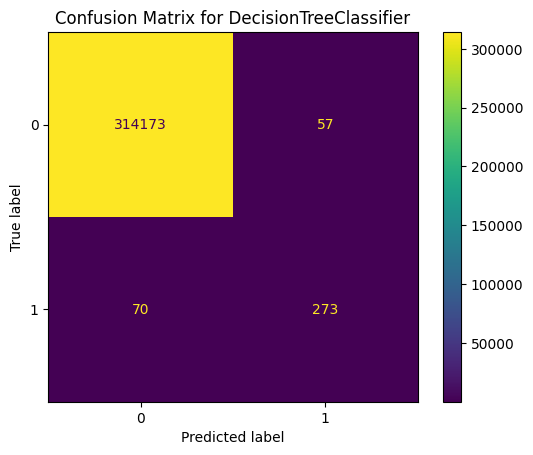

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9993515018771477 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314360
           1       0.51      0.83      0.63       213

    accuracy                           1.00    314573
   macro avg       0.76      0.91      0.82    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


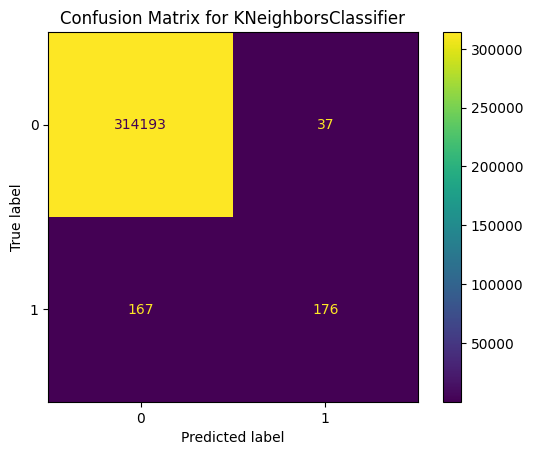

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\3882450370.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train3,y_train3)



For RandomForestClassifier, Accuracy score is 0.99975204483538 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314304
           1       0.78      0.99      0.87       269

    accuracy                           1.00    314573
   macro avg       0.89      1.00      0.94    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


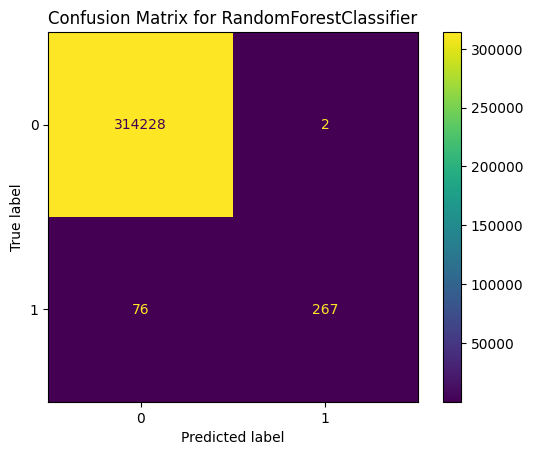

In [67]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train3,y_train3,X_test3,y_test3)

By stratifying the dataset, Random Forest again performed best but with reduced precision (77%) and higher recall (99%) than for the original dataset.

### Scaling the data

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
norm = MinMaxScaler()
rob = RobustScaler()  # best for data with ouliers like our data

#df_ss['step_scaled'] = ss.fit_transform(df['step'].values.reshape(-1,1))

In [69]:
# Standardize the train dataset using StandardScaler
X_train_stan = ss.fit_transform(X_train3)
X_train_stan = pd.DataFrame(X_train_stan, index=X_train3.index, columns = X_train3.columns)

# Standardize the test dataset
X_test_stan = ss.transform(X_test3)
X_test_stan = pd.DataFrame(X_test_stan, index=X_test3.index, columns = X_test3.columns)

print(X_train_stan.head())
print('----------------------------------------------')
print(X_test_stan.head())
print('----------------------------------------------')
print(np.round(X_train_stan.describe().T,1))

            step      type    amount  oldbalanceOrg  newbalanceOrig  \
585327  0.386205 -0.529439 -0.376323      -0.287046       -0.297118   
65578  -1.150134  0.957532 -0.523902      -0.279143       -0.288969   
446123 -0.509993 -0.529439 -0.065106      -0.289579       -0.297118   
842411  0.898317 -0.529439 -0.155151      -0.294078       -0.297118   
86621  -1.086119  1.701018  3.945171      -0.275781       -0.297118   

        oldbalanceDest  newbalanceDest  
585327       -0.425934       -0.436727  
65578        -0.425934       -0.461211  
446123        0.710002        0.676743  
842411       -0.347014       -0.337439  
86621         0.121350        0.558151  
----------------------------------------------
            step      type    amount  oldbalanceOrg  newbalanceOrig  \
444521 -0.509993 -0.529439 -0.595348      -0.280288       -0.283825   
544116 -0.381964 -0.529439 -0.023463      -0.289174       -0.297118   
963372  1.090360  0.957532 -0.592346      -0.199486       -0.204260

In [70]:
X_train_stan.shape, y_train3.shape, X_test_stan.shape, y_test3.shape

((734002, 7), (734002, 1), (314573, 7), (314573, 1))

In [71]:
# Normalize train dataset using MinMaxScaler
X_train_norm = norm.fit_transform(X_train3)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train3.index, columns = X_train3.columns)

# Standardize the test dataset
X_test_norm = norm.transform(X_test3)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test3.index, columns = X_test3.columns)
print(X_train_norm.head())
print('----------------------------------------------')
print(X_test_norm.head())
print('----------------------------------------------')
print(np.round(X_train_norm.describe().T,1))

            step  type    amount  oldbalanceOrg  newbalanceOrig  \
585327  0.340426  0.25  0.005901       0.000539        0.000000   
65578   0.085106  0.75  0.001992       0.001144        0.000632   
446123  0.191489  0.25  0.014143       0.000345        0.000000   
842411  0.425532  0.25  0.011758       0.000000        0.000000   
86621   0.095745  1.00  0.120353       0.001401        0.000000   

        oldbalanceDest  newbalanceDest  
585327        0.000000        0.001398  
65578         0.000000        0.000000  
446123        0.061784        0.064989  
842411        0.004292        0.007069  
86621         0.029767        0.058216  
----------------------------------------------
            step  type    amount  oldbalanceOrg  newbalanceOrig  \
444521  0.191489  0.25  0.000100       0.001056        0.001031   
544116  0.212766  0.25  0.015246       0.000376        0.000000   
963372  0.457447  0.75  0.000179       0.007245        0.007199   
162883  0.117021  0.25  0.013773    

In [72]:
X_train_norm.shape, y_train3.shape, X_test_norm.shape, y_test3.shape

((734002, 7), (734002, 1), (314573, 7), (314573, 1))

In [73]:
# Normalize train dataset using RobustScaler
X_train_rob = rob.fit_transform(X_train3)
X_train_rob = pd.DataFrame(X_train_rob, index=X_train3.index, columns = X_train3.columns)

# Normalize the test dataset
X_test_rob = rob.transform(X_test3)
X_test_rob = pd.DataFrame(X_test_rob, index=X_test3.index, columns = X_test3.columns)
print(X_train_rob.head())
print('----------------------------------------------')
print(X_test_rob.head())
print('----------------------------------------------')
print(np.round(X_train_rob.describe().T,1))
print('----------------------------------------------')
print(np.round(y_train3.describe().T,1))

            step  type    amount  oldbalanceOrg  newbalanceOrig  \
585327  0.541667   0.0 -0.086220       0.036363        0.000000   
65578  -0.458333   1.0 -0.280049       0.208493        0.140365   
446123 -0.041667   0.0  0.322527      -0.018801        0.000000   
842411  0.875000   0.0  0.204264      -0.116789        0.000000   
86621  -0.416667   1.5  5.589564       0.281711        0.000000   

        oldbalanceDest  newbalanceDest  
585327       -0.138768       -0.138153  
65578        -0.138768       -0.189364  
446123        2.696333        2.190866  
842411        0.058202        0.069525  
86621         1.227158        1.942810  
----------------------------------------------
            step  type    amount  oldbalanceOrg  newbalanceOrig  \
444521 -0.041667   0.0 -0.373884       0.183565        0.228963   
544116  0.041667   0.0  0.377221      -0.009970        0.000000   
963372  1.000000   1.0 -0.369941       1.943397        1.599363   
162883 -0.333333   0.0  0.304175    

### Model the data using re-scaled dataset

In [74]:
# Model standardized data
def trainer(model,X_train_stan,y_train3,X_test_stan,y_test3):
    #fit your model
    model.fit(X_train_stan,y_train3)
    #predict on the fitted model
    prediction3 = model.predict(X_test_stan)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction3,y_test3)))
    print(classification_report(prediction3, y_test3))
    plot_confusion_matrix(model, X_test_stan, y_test3)
    plt.title('Confusion Matrix for Standardized {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.9991703038722332 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314469
           1       0.27      0.89      0.42       104

    accuracy                           1.00    314573
   macro avg       0.64      0.95      0.71    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


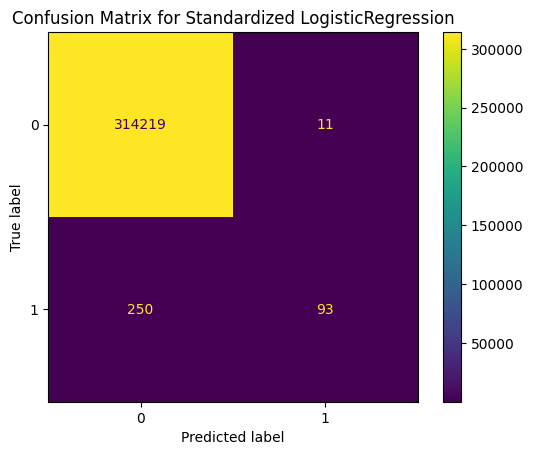


For DecisionTreeClassifier, Accuracy score is 0.9996026359541347 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314243
           1       0.80      0.83      0.81       330

    accuracy                           1.00    314573
   macro avg       0.90      0.92      0.91    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


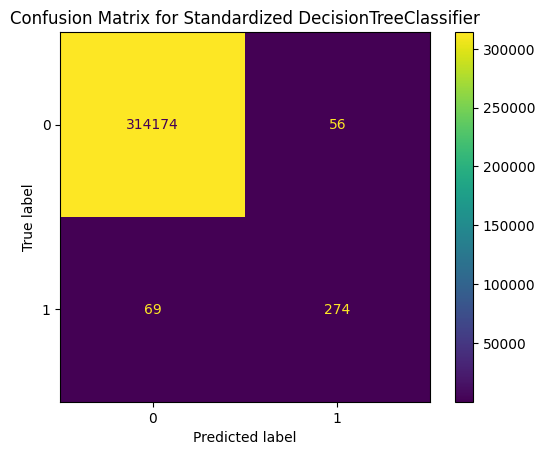

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9994723005470908 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314394
           1       0.52      0.99      0.68       179

    accuracy                           1.00    314573
   macro avg       0.76      1.00      0.84    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


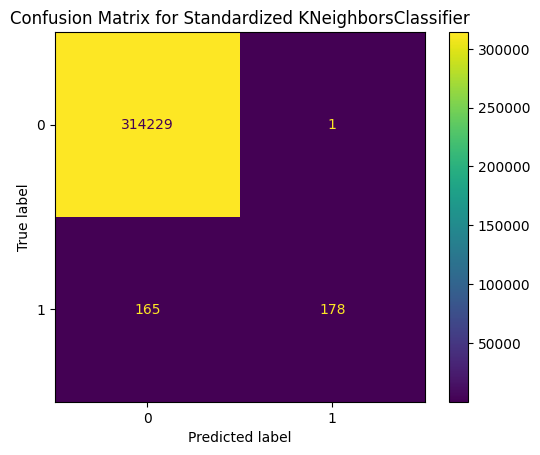

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\437353705.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_stan,y_train3)



For RandomForestClassifier, Accuracy score is 0.9997425080982792 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314305
           1       0.77      0.99      0.87       268

    accuracy                           1.00    314573
   macro avg       0.89      0.99      0.93    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


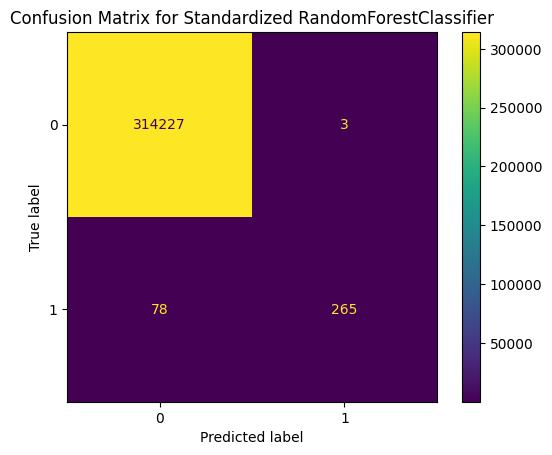

In [75]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train_stan,y_train3,X_test_stan,y_test3)

In [76]:
# Model MinMax Normalized data
def trainer(model,X_train_norm,y_train3,X_test_norm,y_test3):
    #fit your model
    model.fit(X_train_norm,y_train3)
    #predict on the fitted model
    prediction3 = model.predict(X_test_norm)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction3,y_test3)))
    print(classification_report(prediction3, y_test3))
    plot_confusion_matrix(model, X_test_norm, y_test3)
    plt.title('Confusion Matrix for MinMax Normalized {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.9989859269549516 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314541
           1       0.08      0.88      0.15        32

    accuracy                           1.00    314573
   macro avg       0.54      0.94      0.57    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


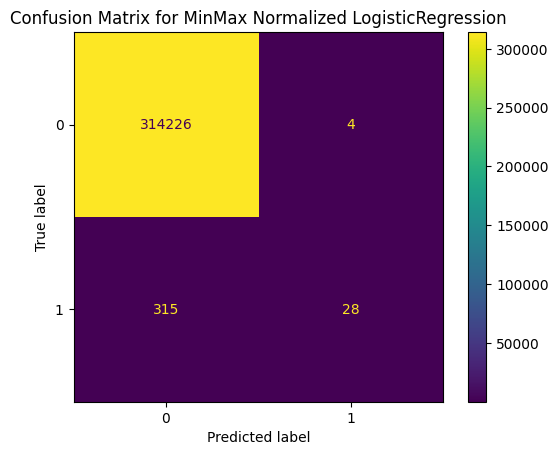


For DecisionTreeClassifier, Accuracy score is 0.9995644890057316 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314239
           1       0.79      0.81      0.80       334

    accuracy                           1.00    314573
   macro avg       0.89      0.90      0.90    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


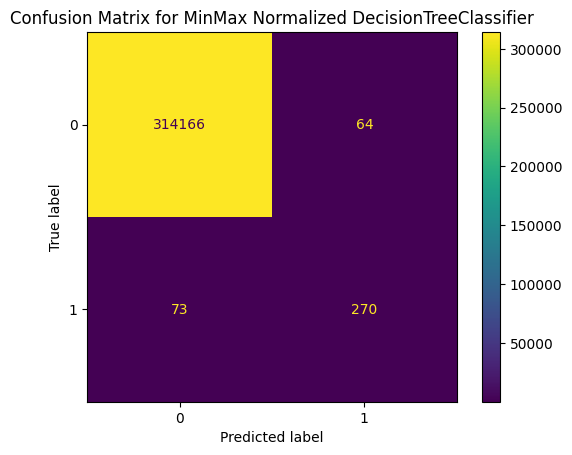

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9995422366191631 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314374
           1       0.58      1.00      0.73       199

    accuracy                           1.00    314573
   macro avg       0.79      1.00      0.87    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


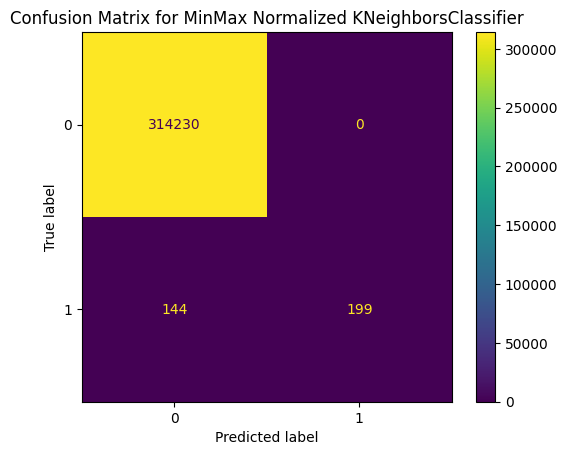

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\4112208396.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_norm,y_train3)



For RandomForestClassifier, Accuracy score is 0.9997361502735455 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314305
           1       0.77      0.99      0.86       268

    accuracy                           1.00    314573
   macro avg       0.88      0.99      0.93    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


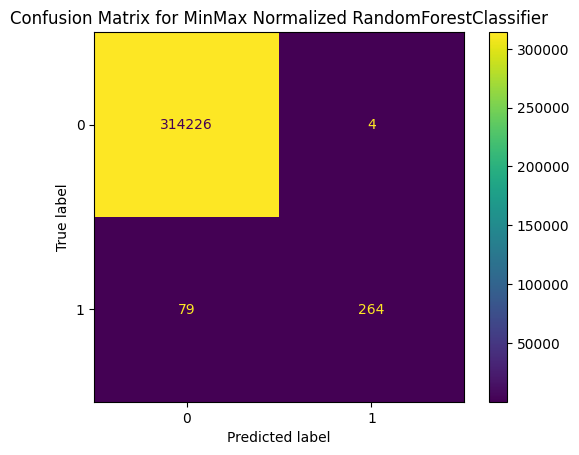

In [77]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train_norm,y_train3,X_test_norm,y_test3)

In [78]:
# Model Robust Normalized data
def trainer(model,X_train_rob,y_train3,X_test_rob,y_test3):
    #fit your model
    model.fit(X_train_rob,y_train3)
    #predict on the fitted model
    prediction3 = model.predict(X_test_rob)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction3,y_test3)))
    print(classification_report(prediction3, y_test3))
    plot_confusion_matrix(model, X_test_rob, y_test3)
    plt.title('Confusion Matrix for Robust Normalized {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.9992783868927085 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314427
           1       0.38      0.90      0.54       146

    accuracy                           1.00    314573
   macro avg       0.69      0.95      0.77    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


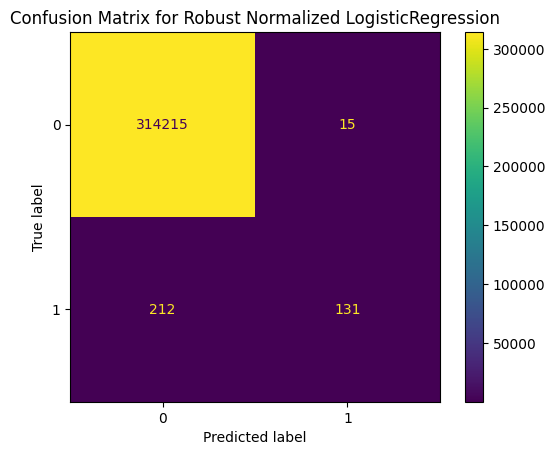


For DecisionTreeClassifier, Accuracy score is 0.9996058148665016 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314244
           1       0.80      0.83      0.82       329

    accuracy                           1.00    314573
   macro avg       0.90      0.92      0.91    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


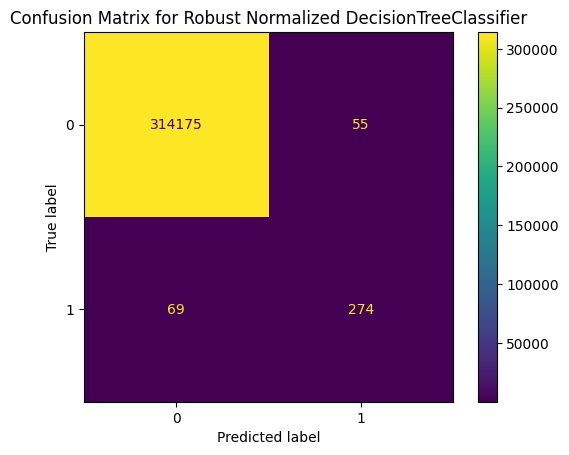

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9995835624799331 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314333
           1       0.66      0.94      0.78       240

    accuracy                           1.00    314573
   macro avg       0.83      0.97      0.89    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


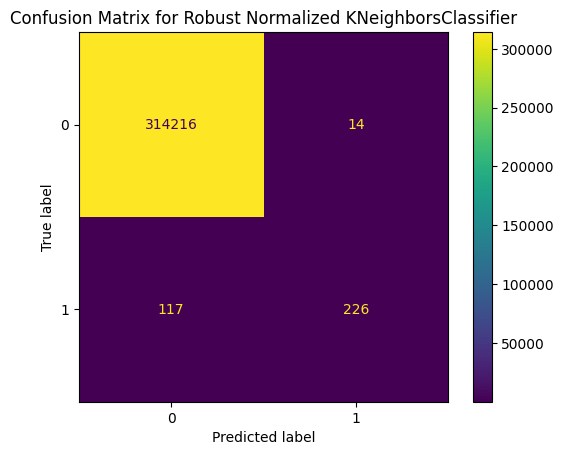

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\425341261.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_rob,y_train3)



For RandomForestClassifier, Accuracy score is 0.9997425080982792 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314305
           1       0.77      0.99      0.87       268

    accuracy                           1.00    314573
   macro avg       0.89      0.99      0.93    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


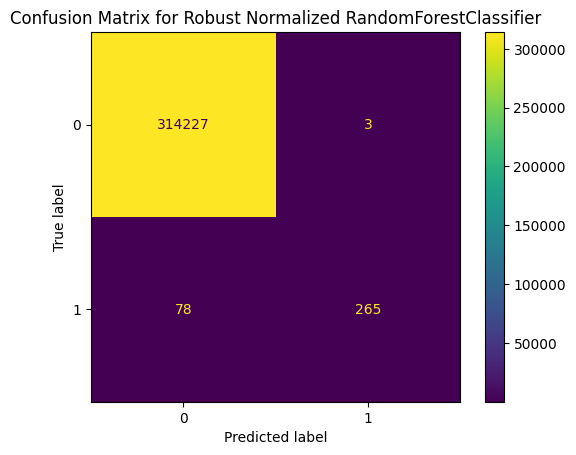

In [79]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train_rob,y_train3,X_test_rob,y_test3)

In [80]:
X_train_rob.shape, y_train3.shape ,X_test_rob.shape,y_test3.shape

((734002, 7), (734002, 1), (314573, 7), (314573, 1))

- **Robust Normalization** was best for Logistic Regression, KNeighbours and Random Forest Classifier.
- **Standardization** worked best for Decision Tree Classifier.
- For **Random Forest**, the metrics from all 3 scaling methods gave similar result.
- **Random Forest** performed best with accuracy of 99.97%, precision of 78%, recall of 99% and F1-score of 0.87.
- **MinMax** was the worst form of Normalization for Logistic Regression.


# 5. Machine Learning Modelling with Stratified, Rescaled & Resampled Dataset

### Handle imbalance through combination of Oversampling & Undersampling using Robust Normalized Dataset

In [81]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


#### Import Libraries

In [82]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
## first method 
s= SMOTE()
##second method
smt= SMOTETomek()
##Third method
tk= TomekLinks()
X_res, y_res= s.fit_resample(X_train_rob, y_train3)
X_res1, y_res1= smt.fit_resample(X_train_rob, y_train3)
X_res2, y_res2= tk.fit_resample(X_train_rob, y_train3)

print('For oversampling: ', X_res.shape, y_res.shape)
print('For combined sampling: ', X_res1.shape, y_res1.shape)
print('For undersampling: ', X_res2.shape, y_res2.shape)

For oversampling:  (1466406, 7) (1466406, 1)
For combined sampling:  (1466366, 7) (1466366, 1)
For undersampling:  (733911, 7) (733911, 1)


#### Crate new, resampled dataframes

In [83]:
#Creating a new Oversampling Data Frame
df_y_oversampler = pd.DataFrame(y_res)
df_X_oversampler = pd.DataFrame(X_res)

print('not_Fraud:', df_y_oversampler.isFraud.value_counts()[0])
print('Fraud:',df_y_oversampler.isFraud.value_counts()[1])

print('---------------------------------------')
print('---------------------------------------')

print('not_Fraud:', round(df_y_oversampler.isFraud.value_counts()[0]/len(df_y_oversampler) * 100,2), '% of the dataset')
print('Fraud:', round(df_y_oversampler.isFraud.value_counts()[1]/len(df_y_oversampler) * 100,2), '% of the dataset')


not_Fraud: 733203
Fraud: 733203
---------------------------------------
---------------------------------------
not_Fraud: 50.0 % of the dataset
Fraud: 50.0 % of the dataset


In [84]:
#Creating a new Combined Oversampling-Undersampling Data Frame
df_y_combination = pd.DataFrame(y_res1)
df_X_combination = pd.DataFrame(X_res1)

print('not_Fraud:', df_y_combination.isFraud.value_counts()[0])
print('Fraud:',df_y_combination.isFraud.value_counts()[1])

print('---------------------------------------')
print('---------------------------------------')

print('not_Fraud:', round(df_y_combination.isFraud.value_counts()[0]/len(df_y_combination) * 100,2), '% of the dataset')
print('Fraud:', round(df_y_combination.isFraud.value_counts()[1]/len(df_y_combination) * 100,2), '% of the dataset')


not_Fraud: 733183
Fraud: 733183
---------------------------------------
---------------------------------------
not_Fraud: 50.0 % of the dataset
Fraud: 50.0 % of the dataset


In [85]:
#Creating a new Undersampling Data Frame
df_y_undersampler = pd.DataFrame(y_res2)
df_X_undersampler = pd.DataFrame(X_res2)

print('not_Fraud:', df_y_undersampler.isFraud.value_counts()[0])
print('Fraud:',df_y_undersampler.isFraud.value_counts()[1])

print('---------------------------------------')
print('---------------------------------------')

print('not_Fraud:', round(df_y_undersampler.isFraud.value_counts()[0]/len(df_y_undersampler) * 100,2), '% of the dataset')
print('Fraud:', round(df_y_undersampler.isFraud.value_counts()[1]/len(df_y_undersampler) * 100,2), '% of the dataset')


not_Fraud: 733112
Fraud: 799
---------------------------------------
---------------------------------------
not_Fraud: 99.89 % of the dataset
Fraud: 0.11 % of the dataset


#### Model the data based on Robust-Normalized Dat and different types of Resampling

In [86]:
# Model Robust Normalized and Oversampled data
def trainer(model,X_res,y_res,X_test_rob,y_test3):
    #fit your model
    model.fit(X_res,y_res)
    #predict on the fitted model
    prediction3 = model.predict(X_test_rob)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction3,y_test3)))
    print(classification_report(prediction3, y_test3))
    plot_confusion_matrix(model, X_test_rob, y_test3)
    plt.title('Confusion Matrix for Robust Normalized and Oversampled {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.963111900894228 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    302730
           1       0.85      0.02      0.05     11843

    accuracy                           0.96    314573
   macro avg       0.91      0.51      0.51    314573
weighted avg       0.96      0.96      0.95    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


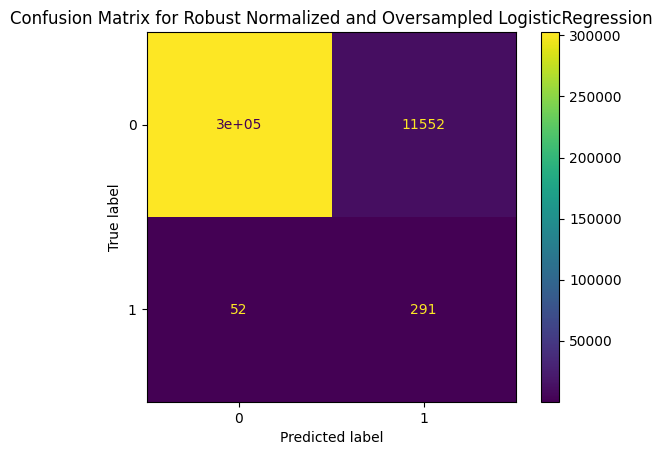


For DecisionTreeClassifier, Accuracy score is 0.9987761187387347 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313933
           1       0.87      0.47      0.61       640

    accuracy                           1.00    314573
   macro avg       0.94      0.73      0.80    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


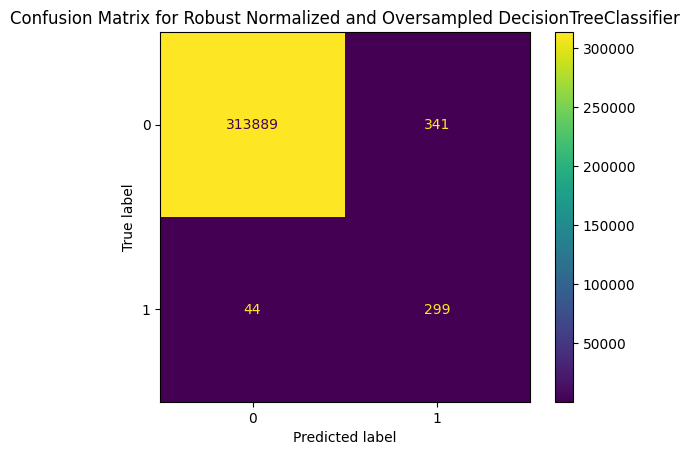

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9952952096969543 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    312852
           1       0.85      0.17      0.28      1721

    accuracy                           1.00    314573
   macro avg       0.92      0.58      0.64    314573
weighted avg       0.99      1.00      0.99    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


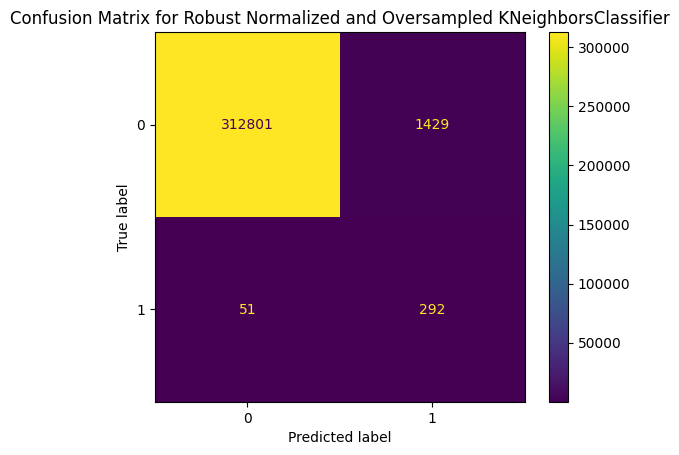

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\2173206620.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res,y_res)



For RandomForestClassifier, Accuracy score is 0.999341965140047 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314119
           1       0.86      0.65      0.74       454

    accuracy                           1.00    314573
   macro avg       0.93      0.82      0.87    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


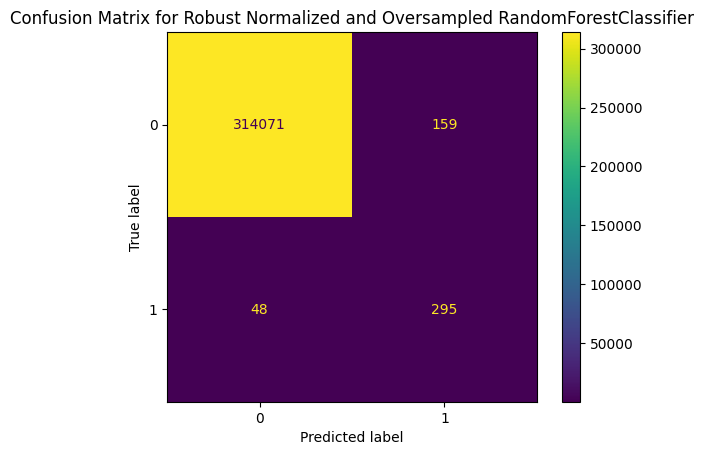

In [87]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_res,y_res,X_test_rob,y_test3)


In [88]:
# Model Robust Normalized and Combination of Oversampled-Undersampled data
def trainer(model,X_res1,y_res1,X_test_rob,y_test3):
    #fit your model
    model.fit(X_res1,y_res1)
    #predict on the fitted model
    prediction3 = model.predict(X_test_rob)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction3,y_test3)))
    print(classification_report(prediction3, y_test3))
    plot_confusion_matrix(model, X_test_rob, y_test3)
    plt.title('Confusion Matrix for Robust Normalized and Oversampled-Undersampled {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.9632040893528688 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    302759
           1       0.85      0.02      0.05     11814

    accuracy                           0.96    314573
   macro avg       0.91      0.51      0.51    314573
weighted avg       0.96      0.96      0.95    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


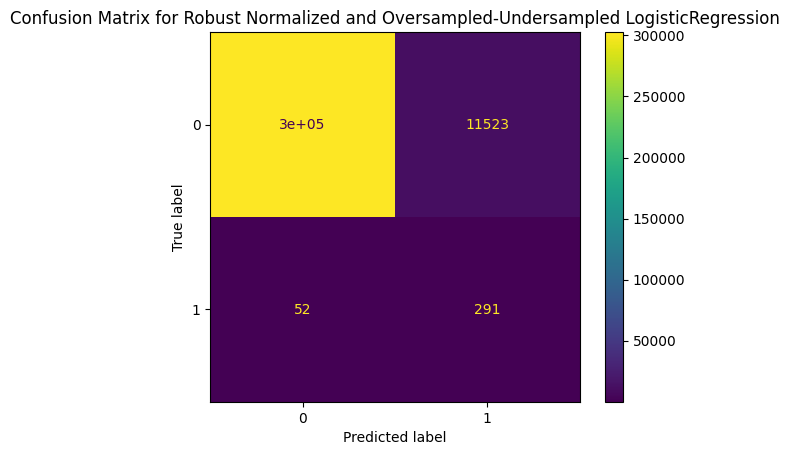


For DecisionTreeClassifier, Accuracy score is 0.9988619493726416 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313960
           1       0.87      0.49      0.63       613

    accuracy                           1.00    314573
   macro avg       0.94      0.74      0.81    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


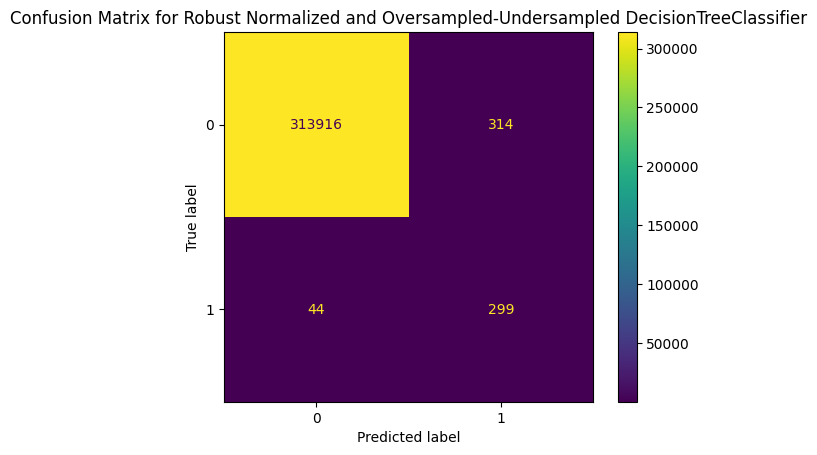

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9952411681867166 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    312835
           1       0.85      0.17      0.28      1738

    accuracy                           1.00    314573
   macro avg       0.92      0.58      0.64    314573
weighted avg       0.99      1.00      0.99    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


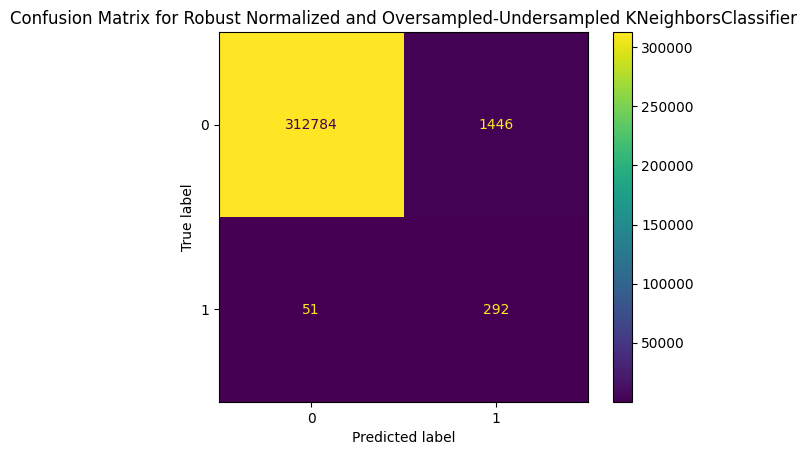

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\130689318.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res1,y_res1)



For RandomForestClassifier, Accuracy score is 0.9993546807895147 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314119
           1       0.87      0.65      0.75       454

    accuracy                           1.00    314573
   macro avg       0.93      0.83      0.87    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


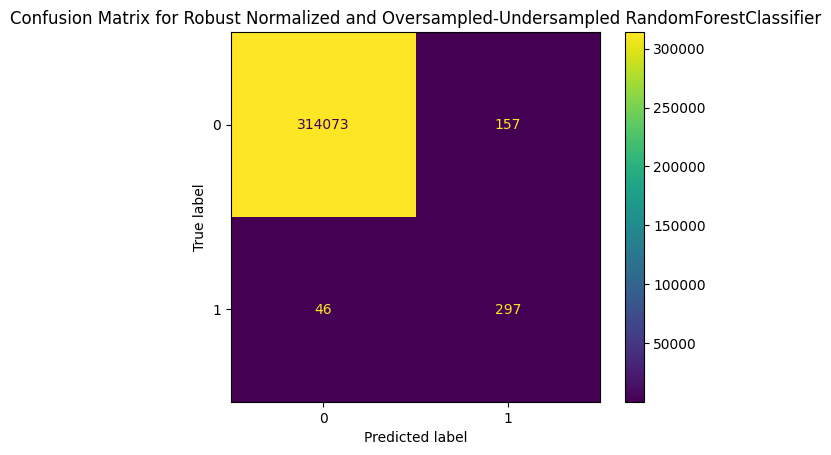

In [89]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_res1,y_res1,X_test_rob,y_test3)

In [90]:
# Model Robust Normalized and Undersampled data
def trainer(model,X_res2,y_res2,X_test_rob,y_test3):
    #fit your model
    model.fit(X_res2,y_res2)
    #predict on the fitted model
    prediction3 = model.predict(X_test_rob)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction3,y_test3)))
    print(classification_report(prediction3, y_test3))
    plot_confusion_matrix(model, X_test_rob, y_test3)
    plt.title('Confusion Matrix for Robust Normalized and Undersampled {}'.format(model.__class__.__name__))
    plt.show()

C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For LogisticRegression, Accuracy score is 0.9992815658050754 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314426
           1       0.38      0.90      0.54       147

    accuracy                           1.00    314573
   macro avg       0.69      0.95      0.77    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


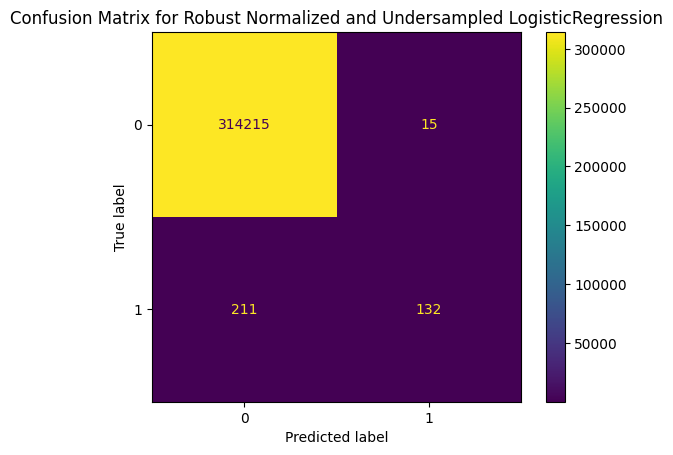


For DecisionTreeClassifier, Accuracy score is 0.9995867413923001 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314246
           1       0.79      0.83      0.81       327

    accuracy                           1.00    314573
   macro avg       0.89      0.91      0.90    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


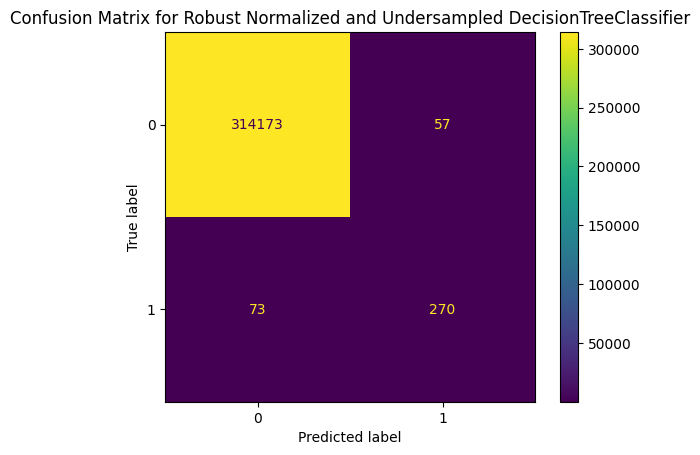

C:\Appl\my_venv_39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



For KNeighborsClassifier, Accuracy score is 0.9995740257428324 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314328
           1       0.66      0.93      0.77       245

    accuracy                           1.00    314573
   macro avg       0.83      0.96      0.89    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


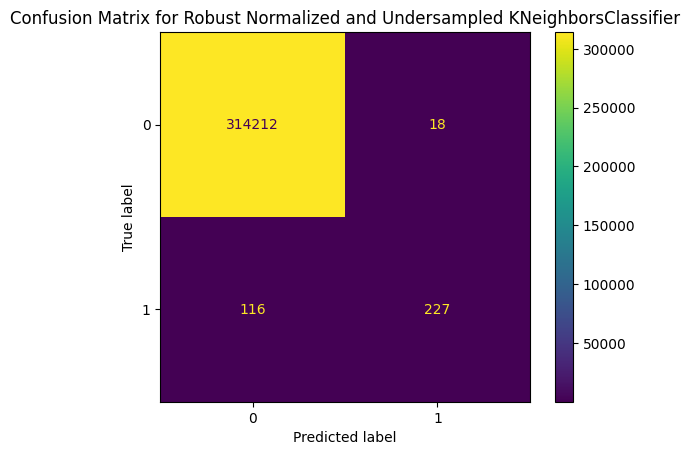

C:\Users\OOGE\AppData\Local\Temp\ipykernel_32480\2927386068.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res2,y_res2)



For RandomForestClassifier, Accuracy score is 0.9997488659230132 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314301
           1       0.78      0.99      0.87       272

    accuracy                           1.00    314573
   macro avg       0.89      0.99      0.94    314573
weighted avg       1.00      1.00      1.00    314573



C:\Appl\my_venv_39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


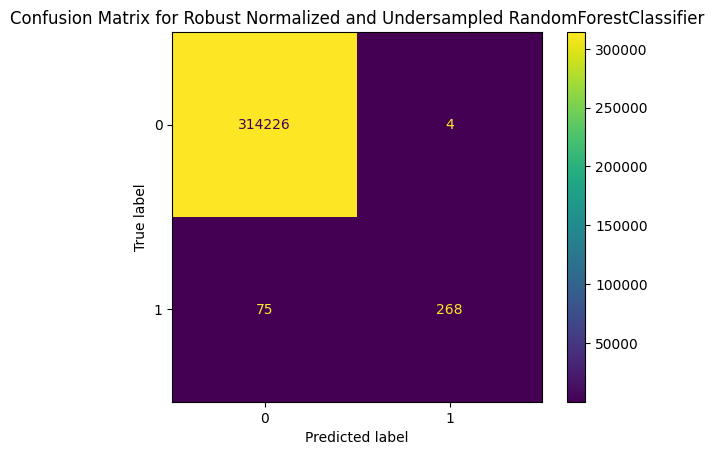

In [91]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_res2,y_res2,X_test_rob,y_test3)

### Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

- The result of resampling the dataset shows the following:

    - Oversampling and combined oversampling-undersampling gave very similar output.
    - Undersampling on the otherhand was much improved in Recall for all the machine models.
    - Recall was a more important metric for choosing the best model for oversampled and combined oversampled-undersampled           data as accuracy in all the models were greater than 99% except in Logistic Regression with 96%. Also, precision ranged         between 85 and 87% in all 4 models of the oversampled and combination data. The only metric that made a difference was         Recall.
    - Using Recall in the oversampled and combination oversample-undersample data showed that Random Forest performed best with       a highest recall of 64% while the worst was Logistic Regression.
    - Undersampled data gave lower precision but much higher recall than the oversampled dataset with Random Forest having the
      highest recall of 99% amongst the 4 ML Models.

## Summary

We have attempted to 4 different Machine Learning Algorithms including:
    - Logistic Regression
    - Decision Tree Classification
    - KNeighbour Classification
    - Random Forest Classification
    
All 4 Machine Learning Algorithms have been modelled within different scenarios including:
    - The original data
    - The stratified data
    - The stratified and rescaled data with 3 different methods of rescaling including:
        - Standardization
        - Normalization using MinMax
        - Normalization using Robust Method
        - The stratified, rescaled and resampled  data with 3 different methods of rescaling on Robust Normalized  dataset     
          including:
        - Oversampling
        - Oversampling-Undersampling Combination
        - Undersampling  
        
The results show the following:
- **Original, Imbalanced data:** With highest accuracy (99.97%), Recall (96%) and F1-Score (0.88) in Random Forest and a second   higher precision (81%), Random Forest is considered to be the best model in this scenario.
- **Original data modelled with top 5 important features:** Recall was thesame 96% but accuracy reduced from 99.97 to 99.96%;     precision reduced drastically from 81% to 69%, while F1-score reduced from 0.88 to 0.80.
- **Stratified data:** Random Forest again performed best but with reduced precision (77%) and higher recall (99%) than for the   original dataset.
- **Stratified, Scaled, data:** Random Forest performed best with accuracy of 99.97%, precision of 78%, recall of 99% and F1-     score of 0.87.
- **Stratified, Scaled, Oversampled data:** Using Recall in the oversampled and combination oversample-undersample data showed   that Random Forest performed best with a highest recall of 64% while the worst was Logistic Regression with a recall of 2%. - - **Stratified, Scaled, Undersampled data:** Undersampled data gave lower precision but much higher recall than the oversampled   dataset with Random Forest having the highest recall of 99% amongst the 4 ML Models.

**Hence Random Forest Classifier is highly recommeded for deployment to production for this dataset.**